In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pyfpgrowth

In [25]:
df = pd.read_csv('dm-end2-4.csv')
print(df.shape)
print(df.info())
display(df.head())

(999, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Invoice  999 non-null    object
 1   Item     999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


,Invoice,Item
0,T1016,240
1,T1009,195
2,T1039,222
3,T1041,249
4,T1005,104


In [26]:
df = df.replace(np.nan, '00nan')
display(df.head())

,Invoice,Item
0,T1016,240
1,T1009,195
2,T1039,222
3,T1041,249
4,T1005,104


In [27]:
top_iv = df['Invoice'].value_counts()
top_sc = df['Item'].value_counts()
print('#Invoices:', top_iv.size)
print(top_iv.head())
print('#StockCode:', top_sc.size)
print(top_sc.head())

#Invoices: 50
T1008    30
T1024    26
T1007    26
T1012    26
T1034    26
Name: Invoice, dtype: int64
#StockCode: 150
181    16
146    12
224    11
238    11
108    11
Name: Item, dtype: int64


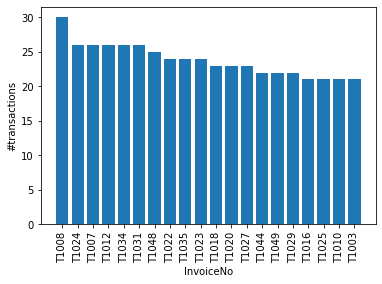

In [28]:
n_plt = 20
top_iv_idx = top_iv[:20].index.astype('str')
plt.bar(top_iv_idx, top_iv[:n_plt])
plt.xticks(rotation=90)
plt.xlabel('InvoiceNo')
plt.ylabel('#transactions')
plt.show()

In [29]:
top_sc1 = top_sc.index[0]
top_sc2 = top_sc.index[1]
print(top_sc1, top_sc2)

181 146


In [30]:
df_sc1 = df[ df['Item']==top_sc1 ]
df_sc2 = df[ df['Item']==top_sc2 ]

In [31]:
df['Invoice'].value_counts()

T1008    30
T1024    26
T1007    26
T1012    26
T1034    26
T1031    26
T1048    25
T1022    24
T1035    24
T1023    24
T1018    23
T1020    23
T1027    23
T1044    22
T1049    22
T1029    22
T1016    21
T1025    21
T1010    21
T1003    21
T1002    21
T1011    20
T1014    20
T1013    20
T1030    20
T1028    20
T1036    20
T1040    20
T1033    20
T1041    19
T1019    19
T1004    18
T1037    18
T1045    18
T1047    18
T1038    17
T1006    17
T1009    17
T1021    17
T1015    17
T1039    17
T1026    17
T1005    16
T1032    16
T1042    16
T1043    15
T1017    14
T1046    14
T1001    12
T1050    10
Name: Invoice, dtype: int64

In [33]:
df_sc1 = df[ df['Item']==top_sc1 ]
df_sc2 = df[ df['Item']==top_sc2 ]

In [34]:
iv_all = set(df['Invoice'])
iv_sc1 = set(df_sc1['Invoice'])
iv_sc2 = set(df_sc2['Invoice'])
iv_both = iv_sc1 & iv_sc2
iv_either = iv_sc1 | iv_sc2

In [35]:
n_all = len(iv_all)
n_sc1 = len(iv_sc1)
n_sc2 = len(iv_sc2)
n_both = len(iv_both)
n_either = len(iv_either)
print(n_all, n_sc1, n_sc2, n_both, n_either)

50 15 11 1 25


In [36]:
print('Conf(sc1 => sc2):', n_both / n_sc1)  # Confidence based on top_sc1
print('Conf(sc2 => sc1):', n_both / n_sc2)  # Confidence based on top_sc2

Conf(sc1 => sc2): 0.06666666666666667
Conf(sc2 => sc1): 0.09090909090909091


In [37]:
a = n_both / n_sc2
b = n_sc1 / n_all
print('Lift(sc1 => sc2):', a/b)

Lift(sc1 => sc2): 0.30303030303030304
